# Unicode & UTF-8

## 1. Unicode

- ~"라떼는 말야"~ 컴퓨터가 세상에 나왔을 때는 ‘영어’와 몇가지 ‘특수문자’만 사용했고 이를 저장하기 위해서 1 byte (0~255)면 충분했음

- 시간이 흘러 네트워크가 발전하고 여러나라 사람들이 컴퓨터를 이용하다 보니  영어 외의 언어로된 홈페이지를 들어가면 글자가 와장창 깨짐

- 따라서 국제적으로 전세계 언어를 모두 표시할 수 있는 표준코드를 만들기로 했다. 바로 "유니코드(Unicode):임 

\\

## 2. UTF-8

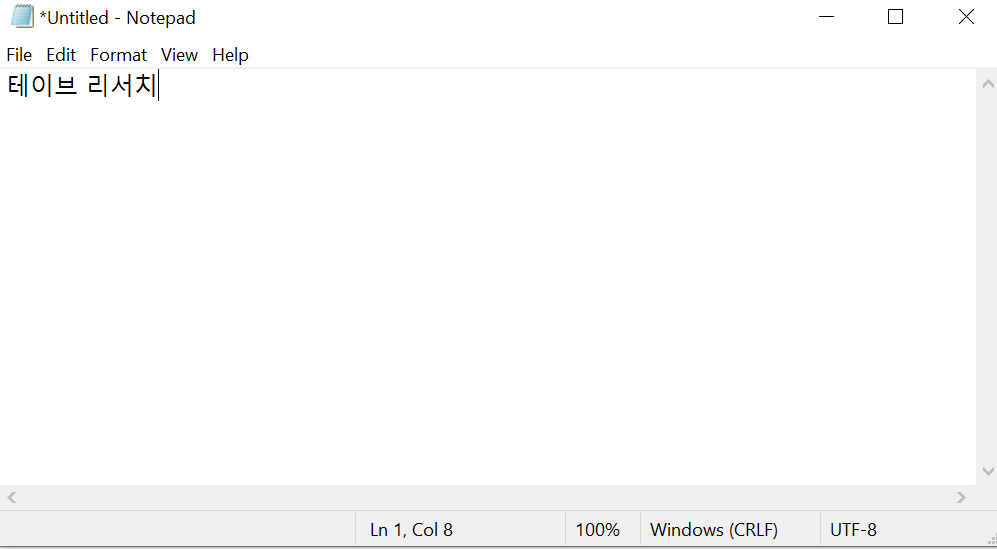

\\

- 인코딩 (Encoding) 이란? 코드를 컴퓨터가 이해할 수 있는 형태로 바꿔주는 것을 말함. (e.g.) 가 = 0001, 나 = 0010 -> 가나나가 -> 0001 0010 0010 0001

- "UTF-8"은 전세계에서 약속한 유니코드를 인코딩하는 방식임. 

- 좀 더 자세히 보면 UTF-8은 가변 인코딩방식임. 즉, 글자마다 byte 길이가 다름. 예를들면 ‘a’는 1 byte이고 ‘가'는 3 byte임 

- 가변을 구분하기 위해 첫 바이트에 표식을 넣었는데 2 byte는 110으로 시작하고 3바이트는 1110으로 시작함

- 나머지 바이트는 10으로 시작함

\\

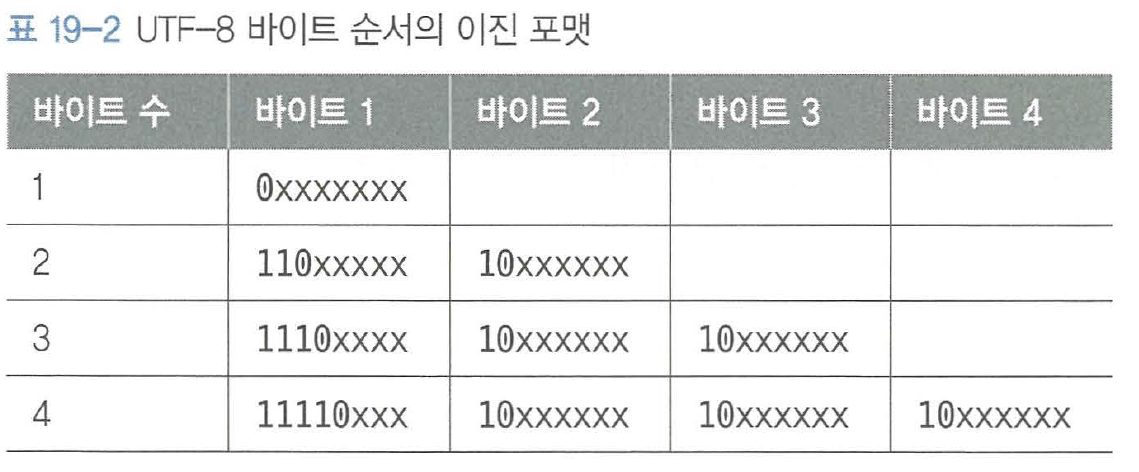


\\

##### 참조: https://jeongdowon.medium.com/unicode%EC%99%80-utf-8-%EA%B0%84%EB%8B%A8%ED%9E%88-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0-b6aa3f7edf96



In [1]:
# page: p561
# sol) Determination based on the first byte.
from typing import List

def validUtf8(data: List[int]) -> bool:
  # by the size of character bytes, determining whether the start is "10"
  # e.g.) 3 bytes, the others should start with "10"
  def check(size):
    # print("start: ", start)
    # print("size: ", size)
    for i in range(start + 1, start + size + 1):
      # print(data[i])
      if i >= len(data) or (data[i] >> 6) != 0b10:
        return False
    return True

  start = 0
  
  while start < len(data):
    # print(len(data))
    # Determine the total character bytes by first byte.
    first = data[start] 

    # first: 0b11000101
    # print("first: ", first)
    # print(first >> 3)

    if (first >> 3) == 0b11110 and check(3): # 4 bytes
      start += 4
    elif (first >> 4) == 0b1110 and check(2): # 3 bytes
      start += 3
    elif (first >> 5) == 0b110 and check(1): # 2 bytes
      start += 2
    elif (first >> 7) == 0: # 1 byte
      start += 1
    else:
      return False

  return True
    


# result = True
data = [197, 130, 1]

# print(bin(197))
# print(bin(130))
# print(bin(1))

# result = False
# data = [235, 140, 4]

print(validUtf8(data))

True
